# Домашнее задание "Теория оптимизации".

### Задание

В данном задании нужно поэксперементировать с оптимизацией функций с помощью библиотеки [scipy](https://docs.scipy.org/doc/scipy/index.html).

Попробуем найти оптимальные параметры (начальные `p0` и метод `method`) некоторой функции f, которая описывает зависимость между x и y. 
Для этой цели будем использовать [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Цель – найти такие параметры, при которых функция будет повторять исходную.

При заданных парах <x, y> если у нас есть представление о виде функции, которая сопоставляет x -> y, но мы знаем только общий вид функции за исключением параметров, curve_fit позволит найти эти параметры.

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

%matplotlib inline

from scipy.optimize import curve_fit

In [134]:
x = np.linspace(1, 7, 300)
y = [ 31.11,  30.55,  29.95,  29.3 ,  28.6 ,  27.86,  27.08,  26.25,
        25.38,  24.48,  23.54,  22.56,  21.54,  20.5 ,  19.42,  18.32,
        17.18,  16.02,  14.84,  13.64,  12.41,  11.17,   9.91,   8.64,
         7.36,   6.07,   4.77,   3.46,   2.15,   0.84,  -0.46,  -1.77,
        -3.07,  -4.36,  -5.64,  -6.91,  -8.17,  -9.41, -10.63, -11.83,
       -13.01, -14.17, -15.3 , -16.4 , -17.47, -18.52, -19.53, -20.5 ,
       -21.44, -22.34, -23.2 , -24.02, -24.8 , -25.54, -26.23, -26.88,
       -27.48, -28.03, -28.53, -28.99, -29.39, -29.74, -30.04, -30.29,
       -30.49, -30.63, -30.72, -30.76, -30.75, -30.68, -30.56, -30.38,
       -30.15, -29.87, -29.54, -29.15, -28.72, -28.23, -27.7 , -27.11,
       -26.48, -25.8 , -25.08, -24.31, -23.5 , -22.64, -21.75, -20.81,
       -19.84, -18.83, -17.79, -16.71, -15.6 , -14.46, -13.3 , -12.11,
       -10.89,  -9.65,  -8.39,  -7.11,  -5.82,  -4.51,  -3.19,  -1.86,
        -0.52,   0.82,   2.17,   3.52,   4.86,   6.21,   7.55,   8.88,
        10.21,  11.52,  12.82,  14.11,  15.37,  16.62,  17.85,  19.05,
        20.23,  21.38,  22.5 ,  23.6 ,  24.65,  25.68,  26.67,  27.62,
        28.53,  29.41,  30.24,  31.03,  31.77,  32.47,  33.12,  33.73,
        34.28,  34.79,  35.25,  35.66,  36.01,  36.32,  36.57,  36.77,
        36.91,  37.01,  37.04,  37.03,  36.96,  36.84,  36.67,  36.44,
        36.17,  35.84,  35.46,  35.02,  34.54,  34.01,  33.43,  32.81,
        32.14,  31.42,  30.66,  29.86,  29.01,  28.13,  27.21,  26.25,
        25.25,  24.23,  23.17,  22.08,  20.96,  19.81,  18.64,  17.45,
        16.24,  15.  ,  13.75,  12.49,  11.21,   9.93,   8.63,   7.33,
         6.02,   4.71,   3.4 ,   2.1 ,   0.8 ,  -0.5 ,  -1.79,  -3.06,
        -4.33,  -5.58,  -6.81,  -8.02,  -9.22, -10.39, -11.53, -12.65,
       -13.74, -14.8 , -15.83, -16.82, -17.78, -18.7 , -19.59, -20.43,
       -21.23, -21.99, -22.71, -23.38, -24.01, -24.59, -25.12, -25.6 ,
       -26.03, -26.41, -26.74, -27.02, -27.24, -27.42, -27.54, -27.61,
       -27.62, -27.58, -27.49, -27.34, -27.14, -26.89, -26.59, -26.23,
       -25.83, -25.37, -24.86, -24.3 , -23.7 , -23.05, -22.35, -21.6 ,
       -20.81, -19.98, -19.11, -18.2 , -17.24, -16.26, -15.23, -14.17,
       -13.08, -11.96, -10.81,  -9.63,  -8.43,  -7.2 ,  -5.95,  -4.68,
        -3.4 ,  -2.1 ,  -0.79,   0.54,   1.87,   3.21,   4.56,   5.91,
         7.26,   8.6 ,   9.95,  11.29,  12.62,  13.94,  15.24,  16.54,
        17.81,  19.07,  20.31,  21.53,  22.72,  23.89,  25.03,  26.13,
        27.21,  28.26,  29.26,  30.24,  31.17,  32.07,  32.92,  33.73,
        34.5 ,  35.23,  35.91,  36.54,  37.12,  37.66,  38.14,  38.58,
        38.96,  39.3 ,  39.58,  39.8 ]

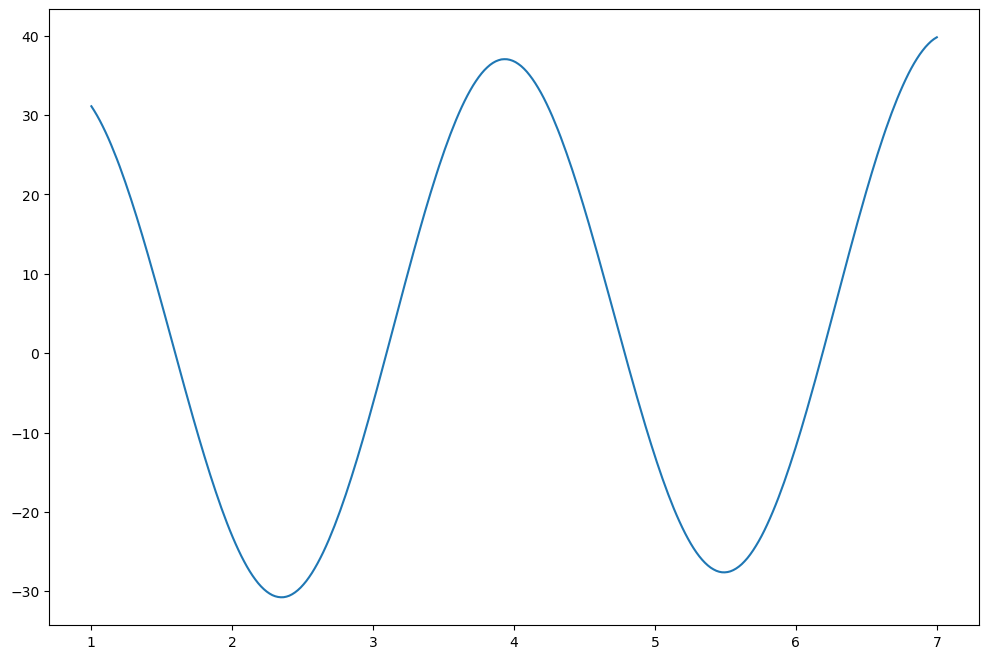

In [135]:
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.show()

In [136]:
# Определяем функцию для подгонки
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [137]:
# Подгонка кривой к данным
start = [1.0, 1.0]  # Начальные предположения для a и b

In [138]:
# Вызываем функцию curve_fit, передав ей модель и данные
# popt — это массив оптимумов a и b, pcov — ковариационная матрица параметров
popt, pcov = curve_fit(f, x, y, p0=start) # method='lm' по умолчанию

In [139]:
a_optimal, b_optimal = popt
res = pcov
print(f"Оптимальные параметры: a = {a_optimal}, b = {b_optimal}")
print(f"Ковариационная матрица параметров: \n{res}")

Оптимальные параметры: a = -12.127626805889408, b = 0.8754367986774088
Ковариационная матрица параметров: 
[[3.97022379e+10 1.57544953e+09]
 [1.57544953e+09 2.57525537e+09]]


In [ ]:
# Подгонка кривой с использованием метода 'trf'
popt_trf, pcov_trf = curve_fit(f, x, y, p0=start, method='trf')
# метод 'dogbox'
popt_dogbox, pcov_dogbox = curve_fit(f, x, y, p0=start, method='dogbox')

print(f'Параметры (TRF):{popt_trf}, \n{pcov_trf}')
print(f'Параметры (Dogbox):{popt_dogbox}, \n{pcov_dogbox}')

In [141]:
# Предсказание значений
y_fit = f(x, a_optimal, b_optimal)

In [142]:
f(x, res[0][0], res[0][1])

/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_4453/1214691763.py:3: RuntimeWarning: overflow encountered in double_scalars
  return np.e**a * np.sin(b*x) + x


array([ inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf, -inf,
        inf, -inf,  inf, -inf,  inf, -inf,  inf, -i

/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_4453/1214691763.py:3: RuntimeWarning: overflow encountered in double_scalars
  return np.e**a * np.sin(b*x) + x


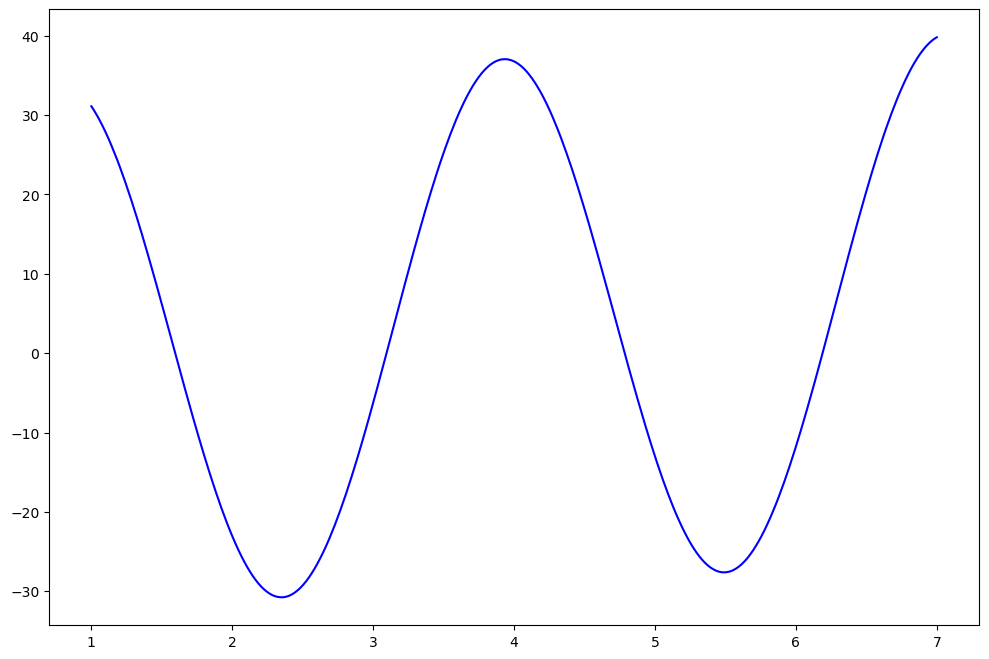

In [143]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='blue')
plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
plt.show()

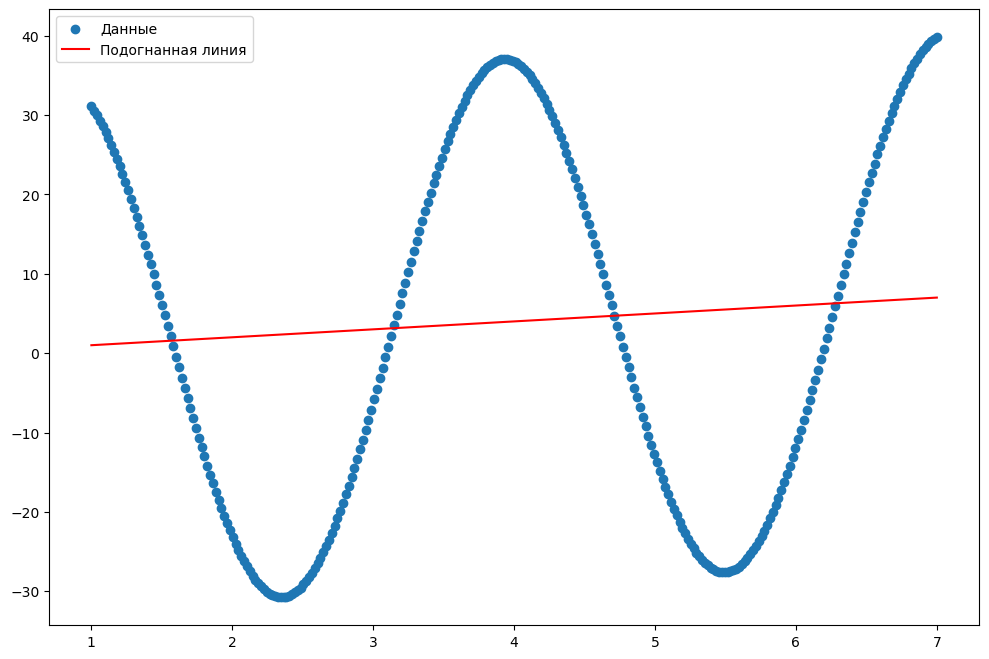

In [144]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Данные')
plt.plot(x, y_fit, color='red', label='Подогнанная линия')
plt.legend()
plt.show()

## Используя начальные данные - start = [1.0, 1.0]
1. С помощью методов TRF, Dogbox оптимальные параметры и матрица не найдены
2. Ковариационная матрица содержит значения inf 
3. На основании предсказанных значений получается прямая, что кажется заведомо не корректным

## Пробую менять начальные данные - start = [1.0, -1.0]

In [152]:
# Меняю начальные данные
start = [1.0, -1.0]  

popt, pcov = curve_fit(f, x, y, p0=start)

In [146]:
a_optimal, b_optimal = popt
res = pcov
print(f"Оптимальные параметры: a = {a_optimal}, b = {b_optimal}")
print(f"Ковариационная матрица параметров: \n{res}")

Оптимальные параметры: a = 2.4998494624643985, b = -1.38193966169526
Ковариационная матрица параметров: 
[[ 0.02078533 -0.00041725]
 [-0.00041725  0.00099397]]


In [147]:
popt_trf, pcov_trf = curve_fit(f, x, y, p0=start, method='trf')

popt_dogbox, pcov_dogbox = curve_fit(f, x, y, p0=start, method='dogbox')

print(f'Параметры (TRF):{popt_trf}, \n{pcov_trf}')
print(f'Параметры (Dogbox):{popt_dogbox}, \n{pcov_dogbox}')

Параметры (TRF):[ 2.49985089 -1.38194309], 
[[ 0.02078513 -0.00041699]
 [-0.00041699  0.00099381]]
Параметры (Dogbox):[ 2.49982803 -1.38188864], 
[[ 0.0207853  -0.00041722]
 [-0.00041722  0.00099395]]


In [148]:
# Предсказание значений
y_fit = f(x, a_optimal, b_optimal)

In [149]:
f(x, res[0][0], res[0][1])

array([0.99957398, 1.01963232, 1.03969067, 1.05974901, 1.07980735,
       1.09986569, 1.11992403, 1.13998237, 1.16004071, 1.18009905,
       1.20015739, 1.22021573, 1.24027407, 1.26033241, 1.28039076,
       1.3004491 , 1.32050744, 1.34056578, 1.36062412, 1.38068246,
       1.4007408 , 1.42079914, 1.44085748, 1.46091582, 1.48097416,
       1.5010325 , 1.52109084, 1.54114919, 1.56120753, 1.58126587,
       1.60132421, 1.62138255, 1.64144089, 1.66149923, 1.68155757,
       1.70161591, 1.72167425, 1.74173259, 1.76179093, 1.78184928,
       1.80190762, 1.82196596, 1.8420243 , 1.86208264, 1.88214098,
       1.90219932, 1.92225766, 1.942316  , 1.96237434, 1.98243268,
       2.00249102, 2.02254937, 2.04260771, 2.06266605, 2.08272439,
       2.10278273, 2.12284107, 2.14289941, 2.16295775, 2.18301609,
       2.20307443, 2.22313277, 2.24319111, 2.26324945, 2.2833078 ,
       2.30336614, 2.32342448, 2.34348282, 2.36354116, 2.3835995 ,
       2.40365784, 2.42371618, 2.44377452, 2.46383286, 2.48389

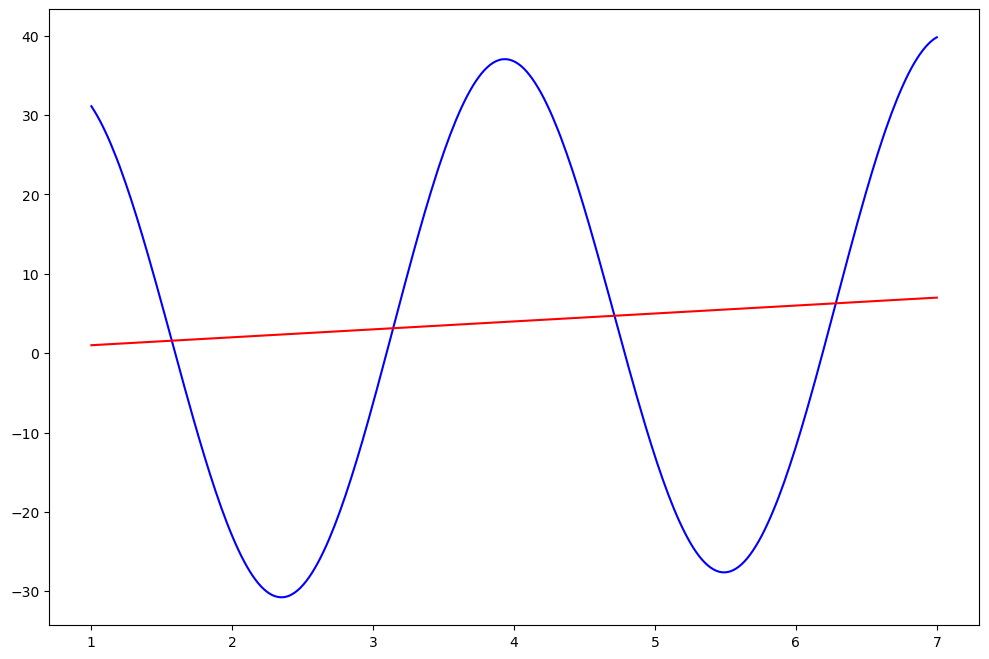

In [150]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='blue')
plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
plt.show()

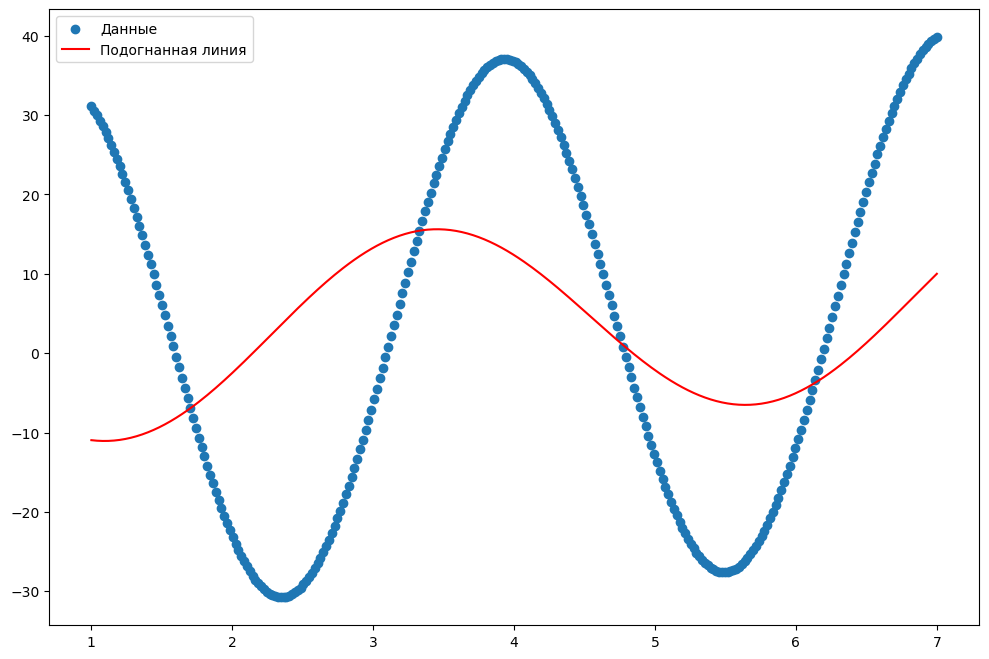

In [151]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Данные')
plt.plot(x, y_fit, color='red', label='Подогнанная линия')
plt.legend()
plt.show()